<a href="https://colab.research.google.com/github/Amelrich/Capstone-Fall-2020/blob/kassie-preprocessing/preprocessing_Synthetic_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing  import MinMaxScaler
from scipy.fftpack import fft,ifft

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from TS_utils import Synthetic_TS_generator
stg = Synthetic_TS_generator(noise=False)
X_synthetic = stg.get_array()

In [6]:
X = X_synthetic

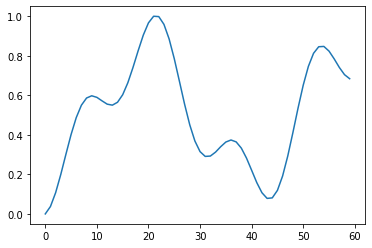

In [ ]:
plt.plot(X_synthetic[1])

### How we achieve multiscale data points

Two methods

* By picking prices every consecutive, alterate and every 2 days 

* By picking consecutive prices for 50, 100, 150 days.

Please see methods `get_multiscale_skipped_values` and `get_multiscale_consecutive_values`



In [9]:
def to_fourier(liste):
  return np.array(fft(np.array(liste))[1:13]).real

def get_multiscale_skipped_values(df_start_end):
  days_60 = df_start_end[-60:]
  days_40 = [0 if i % 2 else x for i, x in enumerate(days_60)]
  days_20 = [0 if i % 3 else x for i, x in enumerate(days_60)]
  dictionary = {'60_days': to_fourier(days_60), '40_days': to_fourier(days_40), 
                '20_days': to_fourier(days_20)}
  return dictionary

def get_multiscale_consecutive_values(df_start_end):
  days_20 = df_start_end[-20:]
  days_40 = df_start_end[-40:]
  days_60 = df_start_end[-60:]
  
  days_20_all = np.append(np.zeros((40)), days_20 ,0)
  days_40_all = np.append(np.zeros((20)), days_40,0)
  
  dictionary = {'20_days': to_fourier(days_20_all), '40_days': to_fourier(days_40_all),
                    '60_days': to_fourier(days_60)}
  return dictionary


skipped_values = []
consecutive_values = []
n = 0
for df in X:
 
  n = n + 1
  if n%1000 == 0:
    print("{} stocksout of {} completed".format(n,len(X)))
  
  #scaler = MinMaxScaler()
  #data_scaled = scaler.fit_transform(df[:,0].reshape(-1, 1)).reshape(1,-1)[0]
  
  dictionary_skipped_values = get_multiscale_skipped_values(df)
  dictionary_consecutive_values = get_multiscale_consecutive_values(df)
 
  datapoint_skipped_values = pd.DataFrame(dictionary_skipped_values).to_numpy()
  datapoint_consecutive_values = pd.DataFrame(dictionary_consecutive_values).to_numpy()


  skipped_values.append(datapoint_skipped_values)
  consecutive_values.append(datapoint_consecutive_values)


1000 stocksout of 3000 completed
2000 stocksout of 3000 completed
3000 stocksout of 3000 completed


In [13]:
np.save("/content/drive/My Drive/capstone/skipped_values_Synthetic_fourier.npy", skipped_values)
np.save("/content/drive/My Drive/capstone/consecutive_values_Synthetic_fourier.npy", consecutive_values)

In [12]:
datapoint_skipped_values

array([[ 0.43996995,  0.47482927,  0.48879594],
       [ 0.31787511,  0.41382423,  0.44826451],
       [ 0.21273864,  0.36132777,  0.41350811],
       [-0.28574461,  0.11218907,  0.24777651],
       [ 1.21729448,  0.86384532,  0.74938852],
       [ 0.71992217,  0.61533323,  0.58441125],
       [ 0.62240345,  0.5667901 ,  0.55300269],
       [ 0.58176825,  0.54673721,  0.54094993],
       [ 0.55993056,  0.53613982,  0.53574013],
       [ 0.54652987,  0.52982848,  0.53424009],
       [ 0.53760126,  0.52583503,  0.53574013],
       [ 0.53130819,  0.52326021,  0.54094993]])

## Visualization of data points

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


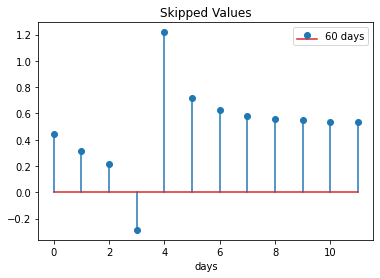

In [16]:
from matplotlib import pyplot as plt 

fig, ax = plt.subplots()
lines = ax.stem(datapoint_skipped_values[:,0])
ax.set_title("Skipped Values") 
ax.set(xlabel='days')
ax.legend(['60 days', '40 days', '20 days'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


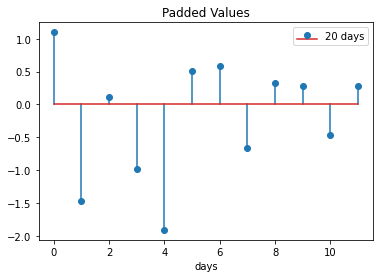

In [15]:
from matplotlib import pyplot as plt 

fig, ax = plt.subplots()
lines = ax.stem(datapoint_consecutive_values[:,0])
ax.set_title("Padded Values") 
ax.set(xlabel='days')
ax.legend(['20 days', '40 days', '60 days'])